In [ ]:
#Tree generation ID3 algorithm same as shown in the previous notebook being reused in this file

In [ ]:
import numpy as np
import random
from random import sample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier 
M = np.genfromtxt('./mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]
M = np.genfromtxt('./mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]


Bagging algorithm started : 

Max-depth= 3 , Bag-size= 10
Test Error = 4.23%.
[[1130   57]
 [  29  815]]

Max-depth= 3 , Bag-size= 20
Test Error = 4.23%.
[[1130   57]
 [  29  815]]

Max-depth= 5 , Bag-size= 10
Test Error = 0.20%.
[[1183    4]
 [   0  844]]

Max-depth= 5 , Bag-size= 20
Test Error = 0.20%.
[[1183    4]
 [   0  844]]

Test Error Matrix:  [4.23, 4.23, 0.2, 0.2]
Bagging algorithm ended.
Boosting Algorithm started: 

Max-depth= 1 , Bag-size= 20
alpha= 1.01
alpha= 0.63
alpha= 0.47
alpha= 0.26
alpha= 0.35
alpha= 0.29
alpha= 0.2
alpha= 0.28
alpha= 0.35
alpha= 0.47
alpha= 0.27
alpha= 0.25
alpha= 0.27
alpha= 0.49
alpha= 0.31
alpha= 0.35
alpha= 0.29
alpha= 0.43
alpha= 0.29
alpha= 0.37
Test Error = 1.87%.
Confusion Matrix :  [[1183    4]
 [  34  810]]

Max-depth= 1 , Bag-size= 40
alpha= 1.01
alpha= 0.64
alpha= 0.48
alpha= 0.25
alpha= 0.38
alpha= 0.29
alpha= 0.37
alpha= 0.32
alpha= 0.3
alpha= 0.34
alpha= 0.29
alpha= 0.29
alpha= 0.28
alpha= 0.23
alpha= 0.18
alpha= 0.22
alpha= 0.42
al

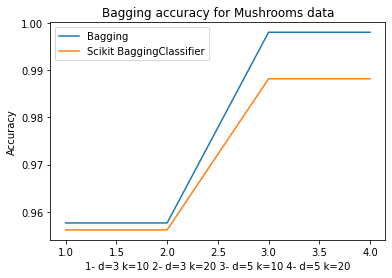

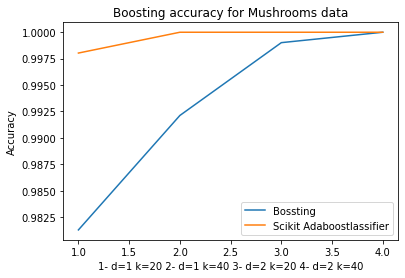

In [ ]:
# from __future__ import print_function

# intialize global variables
chosenAttrValPairs = []
entropyY = 0
bags_X,bags_y = {},{}
accuracy_Scikit_bagging=[]
accuracy_Scikit_Adaboost=[]
accuracy_bagging = []
accuracy_boosting=[]
def partition(x):
 
    # Partition the column vector x into subsets indexed by its unique values (v1, ... vk)
    d = dict()
    UniqueX = np.unique(x)
    for i in UniqueX:
      # print(i)
      arr = np.where(x==i)[0]
      d[i] = arr
    return d
    raise Exception('Function not yet implemented!')

def entropy(y):

    z,z_count = np.unique(y,return_counts=True)
    total = np.size(y)
    h_entropy=0
    for i in range(0,len(z)):
      h_entropy+=(np.true_divide(z_count[i],total)) * np.log2(np.true_divide(z_count[i],total))
      # print(i,h_entropy)

    return -h_entropy
    raise Exception('Function not yet implemented!')

def mutual_information(x, y, xIndex):
# Calculates MI
    mi_dict_vx=dict()
    x_unique,x_counts = np.unique(x,return_counts=True)
    # loop through unique vals of the given column
    for v in x_unique:
      if [xIndex,v] not in chosenAttrValPairs:   # attribute-value pair not selected in previous splits
          y_v = y[np.where(x==v)]
          y_notv= y[np.where(x!=v)]
          mi_dict_vx[v] = entropyY -(np.true_divide(len(y_v),len(y))*entropy(y_v) + np.true_divide(len(y_notv),len(y))*entropy(y_notv))
      else:
          mi_dict_vx[v] = float('-inf')  
    return mi_dict_vx
    
    raise Exception('Function not yet implemented!')

def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):    
    # prepare the exhaustive list of attribute-value pairs at first iteration   
    if depth == 0:
      attribute_value_pairs =[]
      for i in range(len(x[1,:])):
        x_unique = np.unique(x[:,i])
        for j in x_unique:
          attribute_value_pairs.append((i,j))

    #print(attribute_value_pairs)
    #print(chosenAttrValPairs)

    DT= dict()

    # define the exit conditions of the ID3 algorithm
    if len(np.unique(y))==1 :          # pure label
      #print("case 1: pure label\nreturning y=",np.unique(y)[0])    
      return np.unique(y)[0]
 
    if len(attribute_value_pairs) == 0:  # attribute-value pairs exhausted
      #print("case 2: attribute-value pairs exhausted\nreturning y=",np.bincount(y).argmax())
      return np.bincount(y).argmax()
      
    if depth >= max_depth:             # max allowed depth reached
      #print("case 3: max-depth ",max_depth," reached\nreturning y=",np.bincount(y).argmax())
      return np.bincount(y).argmax()

    #call partitions on all the attributes of x - loop on x cols - Get featurewise value indices and add the op dicts into a partitionlist
    partitionList=[]
    mi_dict_x = []
    for i in range(len(x[1,:])): #len(x[1,:]) = 6
      partitionList.append(partition(x[:,i]))
      # calculate Mutual Information
      #print("MI for col ",i,mutual_information(x[:,i],y,i))
      mi_dict_x.append(mutual_information(x[:,i],y,i))

    max_value = max([max(list(i.values())) for i in mi_dict_x ]) # extract the maximum information gain
    if(max_value == float('-inf')):                              # no more information gain obtained
        return np.bincount(y).argmax();                          # return majority label

    for i in mi_dict_x:
       v= list(i.values())
       k=list(i.keys())
       if(max_value in v):
         attriValue = k[v.index(max_value)] # pick the attribute corresponding to max_info_gain
         attriIndex = mi_dict_x.index(i)    # pick the attribute corresponding to max_info_gain

    """ # print attribute-value pair with maax info gain
    print("max_value: ",max_value)
    print("attriIndex :",attriIndex)
    print("attriValue: ",attriValue) """
    temp = partitionList[attriIndex]
    #print("Tree depth =>",depth)
    
    # prepare the X,Y tables to be passed on children nodes based on current split
    x1 = np.delete(x,np.where(x[:,attriIndex]==attriValue),axis=0)
    y1 = np.delete(y,np.where(x[:,attriIndex]==attriValue),axis=0)
    x2 = np.delete(x,np.where(x[:,attriIndex]!=attriValue),axis=0)
    y2 = np.delete(y,np.where(x[:,attriIndex]!=attriValue),axis=0)
   
    # remove attribute-value pair for the current split from the remaining pairs
    attribute_value_pairs.remove((attriIndex,attriValue))

    # add attribute-value pair for the current split to the already selected pairs
    chosenAttrValPairs.append([attriIndex,attriValue])

    # call id3 recursively on children nodes i.e. true-false branch
    if(x1.size != 0):
        DT[(attriIndex,attriValue,False)] = id3(x1,y1,attribute_value_pairs,depth=depth+1,max_depth=max_depth)
    if(x2.size != 0):   
        DT[(attriIndex,attriValue,True)] = id3(x2,y2,attribute_value_pairs,depth=depth+1,max_depth=max_depth)

    return DT

    # raise Exception('Function not yet implemented!')

def predict_example(x, h_ens):
    num_tree,predicted = len(h_ens),[0,0]
    #take weighted voting for each tree/ stump
    for i in range(num_tree):
        res = predict_from_single_tree(x, h_ens[i][0])
        if (res == 0 or res == 1):
            predicted[res] += h_ens[i][1]
    prediction = 0 if predicted[0] > predicted[1] else 1
    return prediction


def predict_from_single_tree(x, tree):
    
    # Returns the predicted label of x according to tree

    for key,val in tree.items():
        if (x[key[0]] == key[1]) == key[2]:
            if type(val) is not dict:
                return val
            else:
                return predict_from_single_tree(x,val)   
                   
    #raise Exception('Function not yet implemented!')

def compute_error(y_true, y_pred):

    # Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
    return (np.true_divide(1,len(y_true)) * sum(y_true != y_pred))
    raise Exception('Function not yet implemented!')

def visualize(tree, depth=0):
# Show the generated tree
    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1}]'.format(split_criterion[0], split_criterion[1]))

        # Print the children
        if type(sub_trees) is dict:
            visualize(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))

#function to create bootstraps by random sampling
def get_bootstraps(X, y, num_trees):
    bag_size = np.shape(X)[0]
    for i in range(num_trees):
        random_X,random_y = [],[]
        for j in range(bag_size):
            random_index = np.random.randint(0,bag_size)
            random_X.append(X[random_index])
            random_y.append(y[random_index])
        #append to global bags
        bags_X[i] = random_X
        bags_y[i] = random_y


def bagging(X, y, max_depth, num_trees):
    #initialize ensemble_forest
    h_ens = []
    global chosenAttrValPairs
    #create bootstrap samples from training data
    get_bootstraps(X, y, num_trees)
    
    for i in range(num_trees):
        chosenAttrValPairs = []
        #get the corresponding bootstrap bag
        ytrn = np.asarray(bags_y[i])
        Xtrn = np.asarray(bags_X[i])
        # Calculate initial entropy of labels Ytrn
        entropyY = entropy(ytrn)
        
        #call id3 algorithm to build the i-th decision tree
        decision_tree = id3(Xtrn, ytrn, max_depth=max_depth)

        #visualize(decision_tree)
        #append new tree to the ensembles
        h_ens.append([decision_tree,1])

    #print(h_ens)
    #return ensemble_forest    
    return h_ens

    #Boosting
#function to create bootstrap for next decision stump by random sampling
def get_bootstrap_boosting(weights,distribution,Xtrn, ytrn):
    bag_size = np.shape(Xtrn)[0]
    bags_X,bags_y = [],[]
    #append the last element again in case (last + 1) index is selected
    X,y = np.append(Xtrn,[Xtrn[bag_size-1]],axis=0),np.append(ytrn,ytrn[bag_size-1])
    for i in range(bag_size):
        random_num = round(np.random.uniform(0,0.99999),4)
        index = np.searchsorted(distribution,random_num)
        #append element to bag
        bags_X.append(X[index])
        bags_y.append(y[index])
    #print("bags=",bags_X,bags_y)   
    return np.asarray(bags_X),np.asarray(bags_y)

#function to check total_errors, calculate alpha and change weights accordingly
def check_performance(y_pred_trn,weights,Xtrn,ytrn):
    #initialize local variables
    total_error,alpha,sum_weights,distribution = 0,0,0,[0]
    #calculate total error = sum of weights of mispredicted examples
    for i in range(len(ytrn)):
        if y_pred_trn[i] != ytrn[i]:
            total_error += weights[i]
    # print("total error=",total_error)
    #calculate alpha or amount_of_say
    alpha = round(0.5 * np.log(np.true_divide((1-total_error+0.000001),(total_error+0.000001))),2)
    print("alpha=",alpha)
    #change weights of examples based on accuracy
    for i in range(len(weights)):
        if y_pred_trn[i] != ytrn[i]:
            weights[i] = weights[i] * np.exp(alpha)
        else:
            weights[i] = weights[i] * np.true_divide(1,np.exp(alpha))
        sum_weights += weights[i]
        #print("sum-w=",sum_weights)
    #normalize weights and populate distribution
    weights[0] = np.true_divide(weights[0],sum_weights)
    distribution[0] = weights[0]
    for i in range(1,len(weights)):
        weights[i] = np.true_divide(weights[i],sum_weights)
        distribution.append(distribution[i-1] + weights[i])
    #print("weights=",weights,"distribution=",distribution)
    bags_X,bags_y = get_bootstrap_boosting(weights,distribution,Xtrn,ytrn)

    return alpha,bags_X,bags_y

#function that implements boosting algorithm
def boosting(X, y, max_depth, num_stumps):
    #initialize ensemble_forest
    h_ens = []
    global chosenAttrValPairs
    #pass initial training data for first decision stump
    Xtrn,ytrn = X, y
    size = len(y)

    for i in range(num_stumps):
        #initialize equal weights for all examples
        weights = np.full(size,np.true_divide(1,size))
        chosenAttrValPairs = []
        # Calculate initial entropy of labels Ytrn
        entropyY = entropy(ytrn)
        
        #call id3 algorithm to build the i-th decision stump
        decision_tree = id3(Xtrn, ytrn, max_depth=max_depth)
        #make predictions on the training data
        y_pred_trn = [ predict_from_single_tree(x,decision_tree) for x in Xtrn ]
        
        #get the current_alpha and weighted bootstrap bag for next decision stump
        alpha,Xtrn,ytrn = check_performance(y_pred_trn,weights,Xtrn,ytrn)
        #visualize the decision stump
        #visualize(decision_tree)
        # print("\n")

        #append new tree to the ensembles
        h_ens.append([decision_tree,alpha])

    #print(h_ens)
    #return ensemble_forest    
    return h_ens   

if __name__ == '__main__':
  #Bagging
    # Load the training data
    M = np.genfromtxt('mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]

    tst_error_matrix = []
    trn_error_matrix = []

    bag_size = [10,20]
    max_depth = [3,5]
    print("Bagging algorithm started : ")
    #learn a decision tree of depth of given depth & size iteratively
    for depth in max_depth:
        for size in bag_size:
            print("\nMax-depth=",depth,", Bag-size=",size)
            h_ens = bagging(Xtrn, ytrn, max_depth=depth,num_trees=size)
            #visualize(decision_tree)
    
            # Compute the test error
            y_pred = [predict_example(x, h_ens) for x in Xtst]
            tst_err = compute_error(ytst, y_pred)
            print('Test Error = {0:4.2f}%.'.format(tst_err * 100))
            print(confusion_matrix(ytst,y_pred))
            accuracy_bagging.append(accuracy_score(ytst,y_pred))
            tst_error_matrix.append(round(tst_err * 100,2))

     
    print("\nTest Error Matrix: ",tst_error_matrix)
    print("Bagging algorithm ended.")
# Boosting
    print("Boosting Algorithm started: ")
 # Load the training data
    M = np.genfromtxt('mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]

    tst_error_matrix = []
    trn_error_matrix = []

    bag_size = [20,40]
    max_depth = [1,2]

    #learn a decision tree of depth of given depth & size iteratively
    for depth in max_depth:
        for size in bag_size:
            print("\nMax-depth=",depth,", Bag-size=",size)
            h_ens = boosting(Xtrn, ytrn, max_depth=depth,num_stumps=size)
    
            # Compute the test error
            y_pred = [predict_example(x, h_ens) for x in Xtst]
            tst_err = compute_error(ytst, y_pred)
            
            print('Test Error = {0:4.2f}%.'.format(tst_err * 100))
            print("Confusion Matrix : ",confusion_matrix(ytst,y_pred))
            accuracy_boosting.append(accuracy_score(ytst,y_pred))
            tst_error_matrix.append(round(tst_err * 100,2))
     
    print("\nTest Error Matrix: ",tst_error_matrix)
    print("Boosting algorithm ended.")
    #Bagging using Scikit - Part: 3a 
    print(" Bagging using Scikit - Part: 3a  started: ")
    # Load the training data
    M = np.genfromtxt('mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    for i in [3,5]:
      for bagsize in [10,20]:
        clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=i),n_estimators= bagsize).fit(Xtrn,ytrn) 
        ypred= clf.predict(Xtst)
        print("Accuracy score for depth",i,"and bagsize ",bagsize,"using scikit baggingclassifier =", accuracy_score(ytst,ypred))
        print ("and confusion Matrix :", confusion_matrix(ytst,ypred))
        accuracy_Scikit_bagging.append(accuracy_score(ytst,ypred))
    print(" Bagging using Scikit - Part: 3a  ended.")

    #Boosting with scikit: Part 3b
    print(" AdaBoost using Scikit - Part: 3b  started: ")
    for i in [1,2]:
      for bagsize in [20,40]:
        clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i),n_estimators=bagsize).fit(Xtrn,ytrn) 
        ypred= clf.predict(Xtst)
        print("Accuracy score for depth",i,"and bagsize ",bagsize,"using scikit AdaBoostClassifier =", accuracy_score(ytst,ypred))
        print ("and confusion Matrix :", confusion_matrix(ytst,ypred))
        accuracy_Scikit_Adaboost.append(accuracy_score(ytst,ypred))
    print("AdaBoost using Scikit learn - Part 3b Ended.")

print("Accuracy of bagging : ",accuracy_bagging)
print("Accuracy of scikit bagging classifier: ", accuracy_Scikit_bagging)
print("Accuracy of boosting : ",accuracy_boosting)
print("Accuracy of scikit adaboost classifier: ", accuracy_Scikit_Adaboost)
fig, splot = plt.subplots()
x=np.arange(1,5)
splot.plot(x,accuracy_bagging)
splot.plot(x,accuracy_Scikit_bagging)
splot.set_title('Bagging accuracy for Mushrooms data')
splot.legend(['Bagging ','Scikit BaggingClassifier'])
splot.yaxis.set_label_text('Accuracy')
splot.xaxis.set_label_text('1- d=3 k=10 2- d=3 k=20 3- d=5 k=10 4- d=5 k=20')
plt.show()
fig, splot1 = plt.subplots()
x1=np.arange(1,5)
splot1.plot(x1,accuracy_boosting)
splot1.plot(x1,accuracy_Scikit_Adaboost)
splot1.set_title('Boosting accuracy for Mushrooms data')
splot1.legend(['Bossting ','Scikit Adaboostlassifier'])
splot1.yaxis.set_label_text('Accuracy')
splot1.xaxis.set_label_text('1- d=1 k=20 2- d=1 k=40 3- d=2 k=20 4- d=2 k=40')
plt.show()